In [ ]:
#! pip install wordcloud


In [4]:
from src.estimation import estimate_text_distribution
from src.MLE import MLE
from src.HC import calculate_hc, filter_adjectives,filter_adjectives_spacy
import pandas as pd
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from collections import defaultdict


/workspaces/higher-criticism-final-project/venv/lib/python3.8/site-packages/scipy/stats/_discrete_distns.py:77: RuntimeWarning: divide by zero encountered in _binom_pdf
  return _boost._binom_pdf(x, n, p)


0.04911273057756607


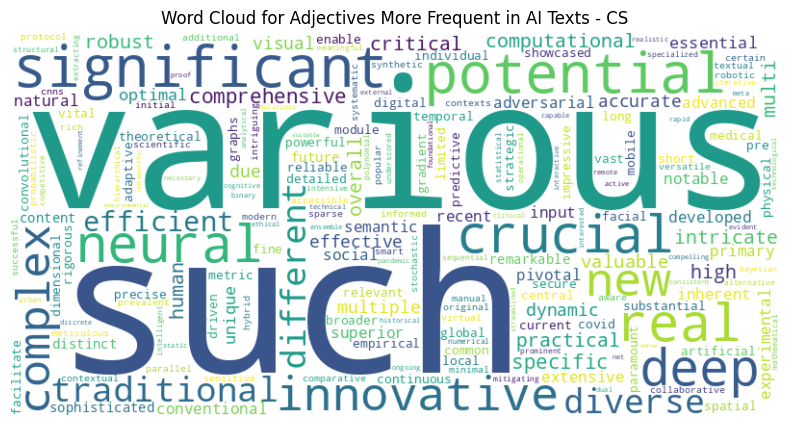

/workspaces/higher-criticism-final-project/venv/lib/python3.8/site-packages/scipy/stats/_discrete_distns.py:77: RuntimeWarning: divide by zero encountered in _binom_pdf
  return _boost._binom_pdf(x, n, p)


0.027798799526341997


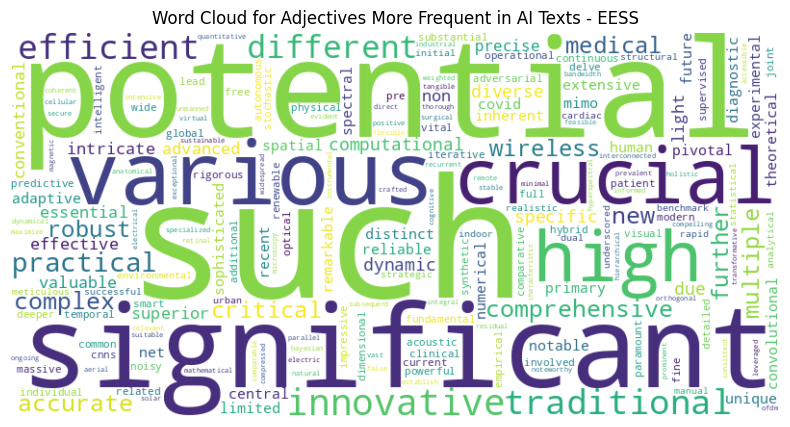

/workspaces/higher-criticism-final-project/venv/lib/python3.8/site-packages/scipy/stats/_discrete_distns.py:77: RuntimeWarning: divide by zero encountered in _binom_pdf
  return _boost._binom_pdf(x, n, p)


0.026857650540865925


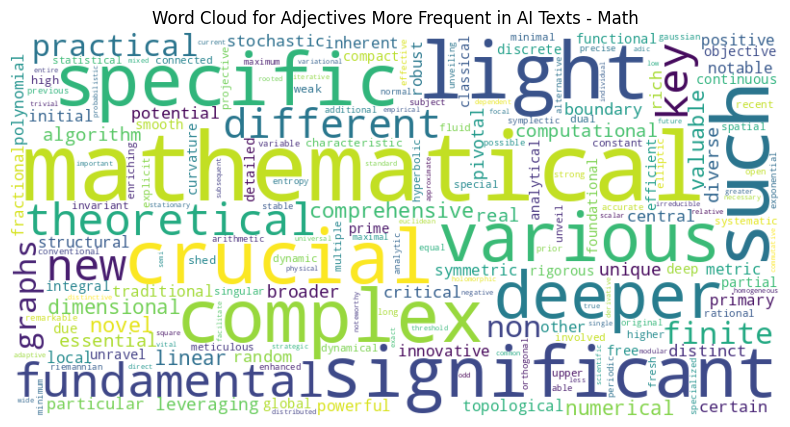

/workspaces/higher-criticism-final-project/venv/lib/python3.8/site-packages/scipy/stats/_discrete_distns.py:77: RuntimeWarning: divide by zero encountered in _binom_pdf
  return _boost._binom_pdf(x, n, p)


0.029101344348719495


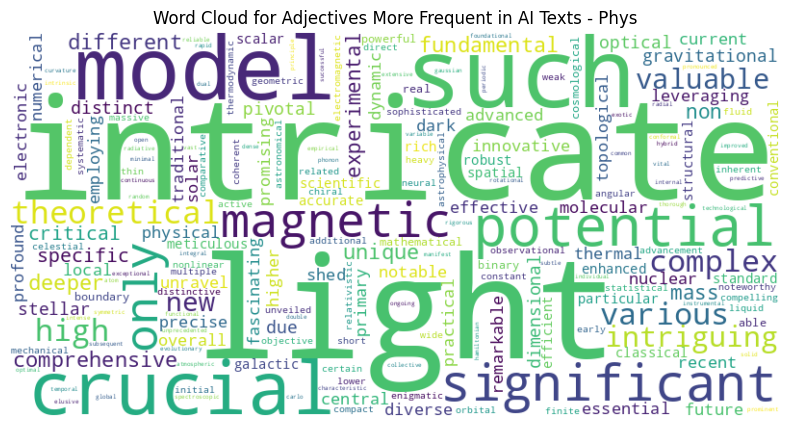

/workspaces/higher-criticism-final-project/venv/lib/python3.8/site-packages/scipy/stats/_discrete_distns.py:77: RuntimeWarning: divide by zero encountered in _binom_pdf
  return _boost._binom_pdf(x, n, p)


0.028088436426446962


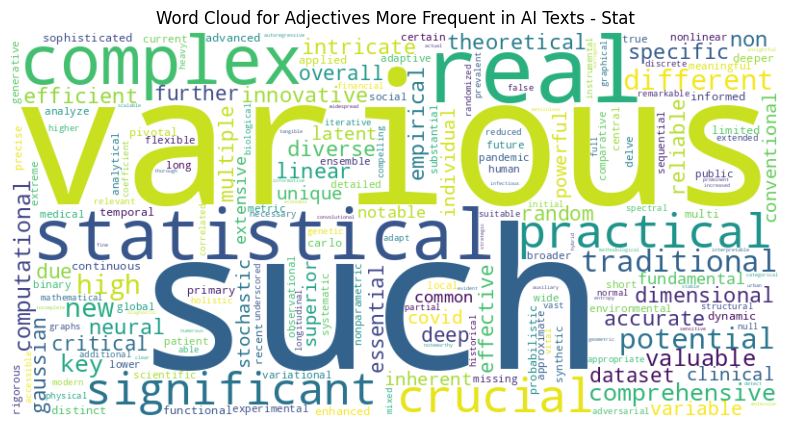

In [3]:
# Iterate over each subject.
for name in ["CS", "EESS", "Math", "Phys", "Stat"]:
    # Load human and AI data.
    human_data = pd.read_parquet(f"data/training_data/{name}/human_data.parquet")
    ai_data = pd.read_parquet(f"data/training_data/{name}/ai_data.parquet")
    
    # Calculate HC words and filter for adjectives.
    num_words, hc_words, more_frequent_in_ai = calculate_hc(human_data, ai_data)
    adjectives_only = filter_adjectives_spacy(more_frequent_in_ai)
    
    # Calculate frequencies of words in `adjectives_only` within AI data.
    word_freq = {}
    for word in adjectives_only:
        # Sum the occurrences of the word across all sentences.
        word_count = sum(sentence.count(word) if isinstance(sentence, str) else sum(token == word for token in sentence) 
                         for sentence in ai_data['ai_sentence'])
        word_freq[word] = word_count
    
    # Generate a word cloud based on these frequencies.
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(word_freq)
    
    # Display the word cloud.
    plt.figure(figsize=(15, 10))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title(f"Word Cloud for Adjectives More Frequent in AI Texts - {name}")
    plt.show()


/workspaces/higher-criticism-final-project/venv/lib/python3.8/site-packages/scipy/stats/_discrete_distns.py:77: RuntimeWarning: divide by zero encountered in _binom_pdf
  return _boost._binom_pdf(x, n, p)


0.04911273057756607


/workspaces/higher-criticism-final-project/venv/lib/python3.8/site-packages/scipy/stats/_discrete_distns.py:77: RuntimeWarning: divide by zero encountered in _binom_pdf
  return _boost._binom_pdf(x, n, p)


0.027798799526341997


/workspaces/higher-criticism-final-project/venv/lib/python3.8/site-packages/scipy/stats/_discrete_distns.py:77: RuntimeWarning: divide by zero encountered in _binom_pdf
  return _boost._binom_pdf(x, n, p)


0.026857650540865925


/workspaces/higher-criticism-final-project/venv/lib/python3.8/site-packages/scipy/stats/_discrete_distns.py:77: RuntimeWarning: divide by zero encountered in _binom_pdf
  return _boost._binom_pdf(x, n, p)


0.029101344348719495


/workspaces/higher-criticism-final-project/venv/lib/python3.8/site-packages/scipy/stats/_discrete_distns.py:77: RuntimeWarning: divide by zero encountered in _binom_pdf
  return _boost._binom_pdf(x, n, p)


0.028088436426446962


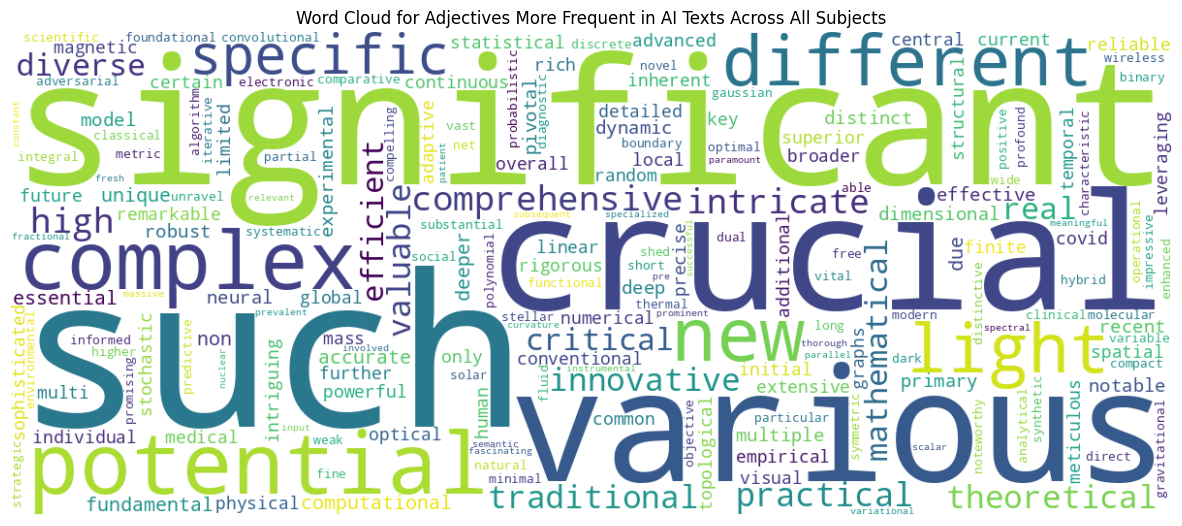

In [5]:
# Initialize a dictionary to store combined word frequencies for adjectives.
combined_word_freq = defaultdict(int)

# Iterate over each subject.
for name in ["CS", "EESS", "Math", "Phys", "Stat"]:
    # Load human and AI data.
    human_data = pd.read_parquet(f"data/training_data/{name}/human_data.parquet")
    ai_data = pd.read_parquet(f"data/training_data/{name}/ai_data.parquet")
    
    # Calculate HC words and filter for adjectives.
    num_words, hc_words, more_frequent_in_ai = calculate_hc(human_data, ai_data)
    adjectives_only = filter_adjectives_spacy(more_frequent_in_ai)
    
    # Calculate frequencies of words in `adjectives_only` within AI data.
    for word in adjectives_only:
        # Sum the occurrences of the word across all sentences.
        word_count = sum(sentence.count(word) if isinstance(sentence, str) else sum(token == word for token in sentence) 
                         for sentence in ai_data['ai_sentence'])
        
        # Add the word count to the combined word frequency.
        combined_word_freq[word] += word_count

# Generate a word cloud based on the combined frequencies.
wordcloud = WordCloud(width=1200, height=500, background_color='white').generate_from_frequencies(combined_word_freq)

# Display the word cloud.
plt.figure(figsize=(15, 10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title("Word Cloud for Adjectives More Frequent in AI Texts Across All Subjects")
plt.show()

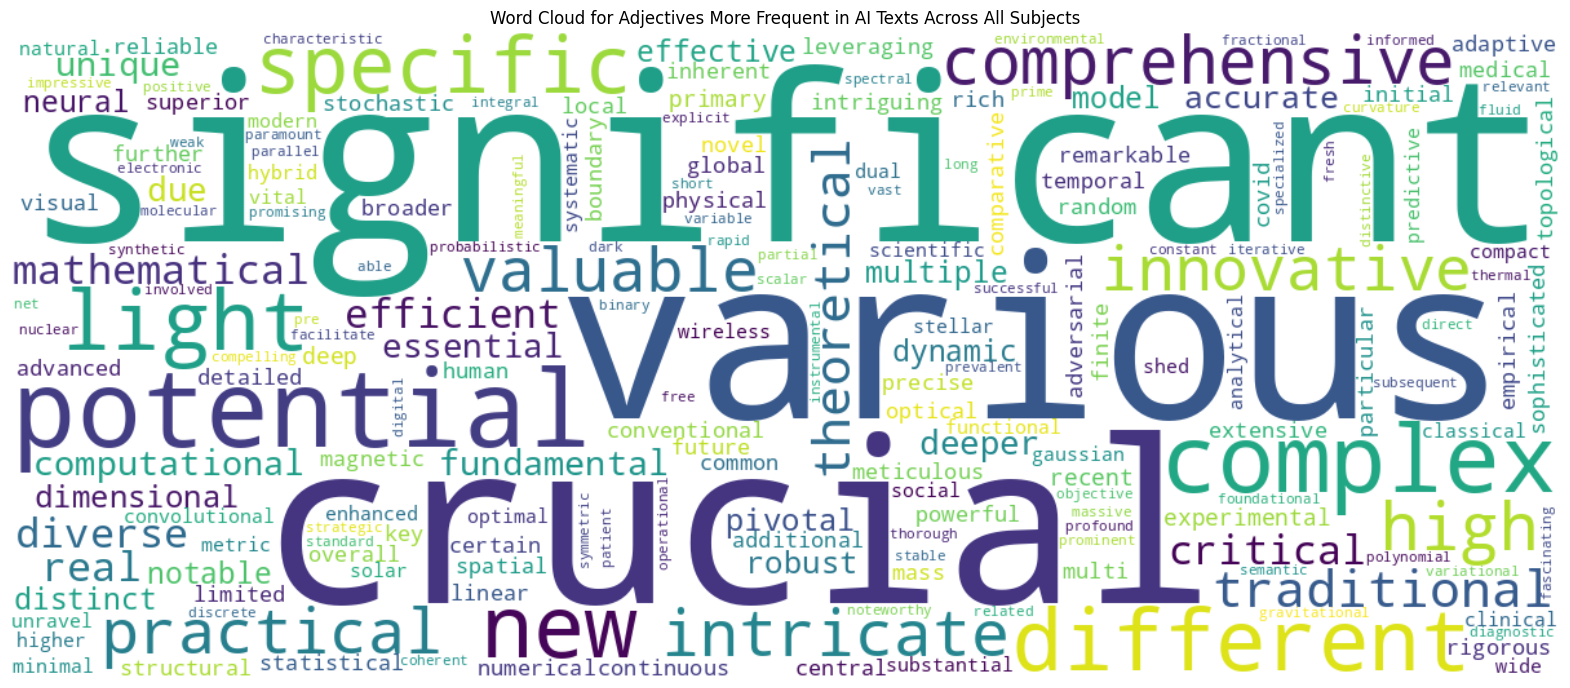

In [19]:
# Generate a word cloud based on the combined frequencies.
combined_word_freq.pop('current', None)
wordcloud = WordCloud(width=1200, height=500, background_color='white').generate_from_frequencies(combined_word_freq)

# Display the word cloud.
plt.figure(figsize=(20, 15))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title("Word Cloud for Adjectives More Frequent in AI Texts Across All Subjects")
plt.show()

In [ ]:
# for each subject, estimate the distribution of human-written text and AI-generated text
for name in ["CS","EESS","Math","Phys","Stat"]:
    estimate_text_distribution(f"data/training_data/{name}/human_data.parquet",f"data/training_data/{name}/ai_data.parquet",f"distribution/{name}.parquet")
    human_data=pd.read_parquet(f"data/training_data/{name}/human_data.parquet")
    ai_data=pd.read_parquet(f"data/training_data/{name}/ai_data.parquet")
    num_words, hc_words,more_frequent_in_ai = calculate_hc(human_data, ai_data)
    print(f"The number of discriminating words: {num_words}")
    adjectives_only = filter_adjectives_spacy(more_frequent_in_ai)
    print("Adjectives significantly used by AI:", adjectives_only)
    print("=====================================")
    print("")
    print("")

In [ ]:
# for each subject, estimate the alpha value of mixed text and calculate the error
for name in ["CS","EESS","Math","Phys","Stat"]:
    # load the framework
    model=MLE(f"distribution/{name}.parquet")
    for alpha in [0,0.025,0.05,0.075,0.1,0.125,0.15,0.175,0.2,0.225,0.25]:
        estimated,ci=model.inference(f"data/validation_data/{name}/ground_truth_alpha_{alpha}.parquet")
        error=abs(estimated-alpha)
        print(f"{'Ground Truth':>10},{'Prediction':>10},{'CI':>10},{'Error':>10}")
        print(f"{alpha:10.3f},{estimated:10.3f},{ci:10.3f},{error:10.3f}")
    print("=====================================")

In [ ]:
for name in ["CS","EESS","Math","Phys","Stat"]:
   human_data=pd.read_parquet(f"data/training_data/{name}/human_data.parquet")
   ai_data=pd.read_parquet(f"data/training_data/{name}/ai_data.parquet")
   # Verify that the expected columns are present in each dataset.
   if 'human_sentence' not in human_data.columns:
       raise ValueError("human_sentence column not found in human data")
   if 'ai_sentence' not in ai_data.columns:
       raise ValueError("ai_sentence column not found in ai data")
   # Calculate HC-discrepancy value
   num_words, hc_words,more_frequent_in_ai = calculate_hc(human_data, ai_data)
   print(f"The number of discriminating words: {num_words}")
   print(f"List of words: {hc_words}")
   print(f"Words more frequently used by AI compared to human: {more_frequent_in_ai}")

   print("=====================================")
   print("")
   print("")

In [ ]:
adjectives_only = filter_adjectives_spacy(more_frequent_in_ai)
print("Adjectives significantly used by AI:", adjectives_only)

In [ ]:
! pip install wordcloud


In [ ]:
from wordcloud import WordCloud

# Combine word counts into a single dictionary for word cloud input.
human_wordcloud = WordCloud(width=800, height=400).generate_from_frequencies(human_freq.to_dict())
ai_wordcloud = WordCloud(width=800, height=400).generate_from_frequencies(ai_freq.to_dict())

# Plot the word clouds.
plt.figure(figsize=(16, 8))

# Human-generated text word cloud.
plt.subplot(1, 2, 1)
plt.imshow(human_wordcloud, interpolation='bilinear')
plt.title('Human Word Cloud')
plt.axis('off')

# AI-generated text word cloud.
plt.subplot(1, 2, 2)
plt.imshow(ai_wordcloud, interpolation='bilinear')
plt.title('AI Word Cloud')
plt.axis('off')

plt.tight_layout()
plt.show()
